In [4]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os, sys
#import lux
from sklearn .preprocessing import MinMaxScaler
#from xgboost import XGBCalssifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","status"]
df = pd.read_csv(r"C:\Users\dell\Desktop\park\parkinsons.csv", names = features)

df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [5]:
df.shape

(195, 23)

In [6]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


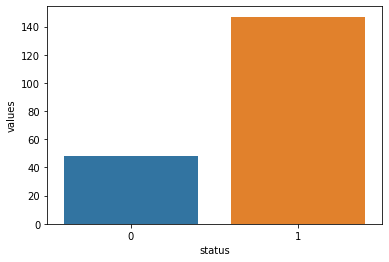

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 

temp= df["status"].value_counts()
temp_df= pd.DataFrame({"status": temp.index, "values": temp.values})
print(sns.barplot(x="status", y="values", data=temp_df))


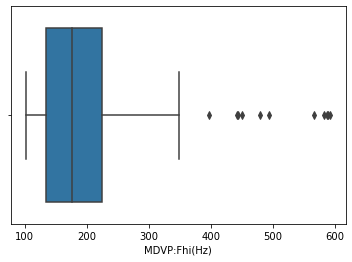

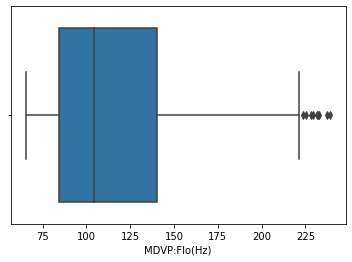

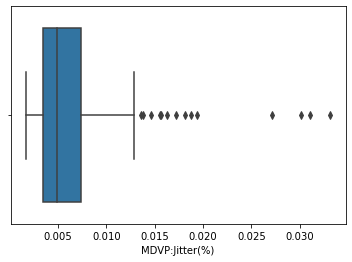

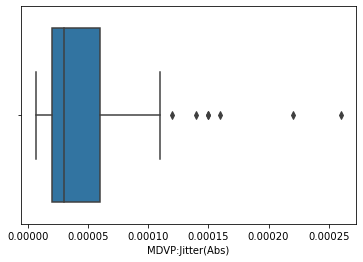

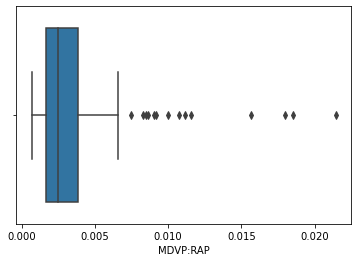

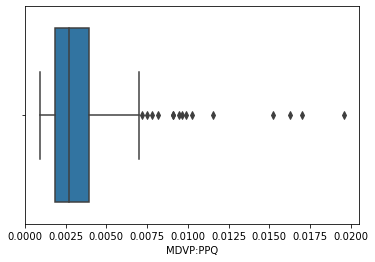

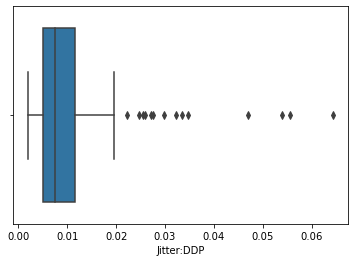

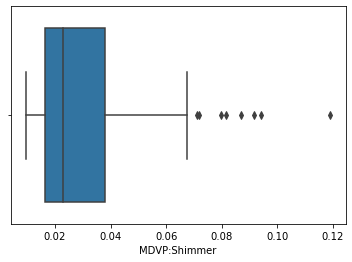

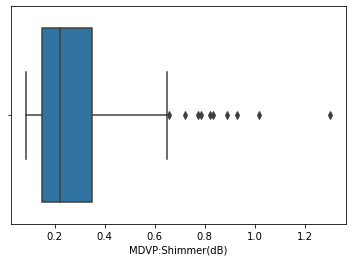

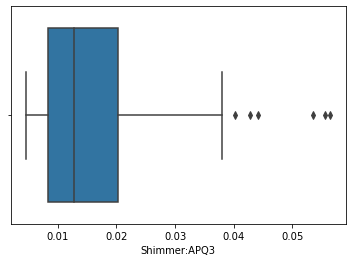

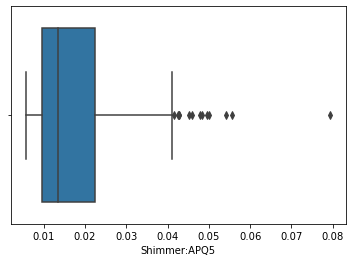

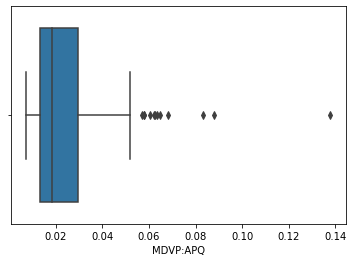

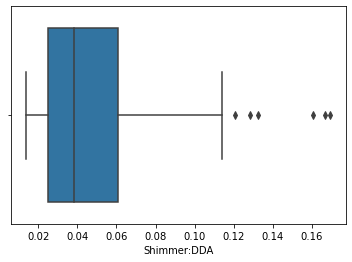

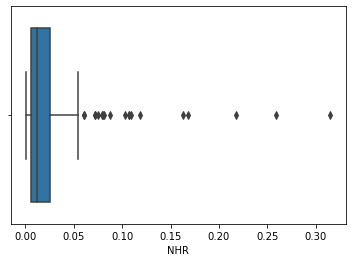

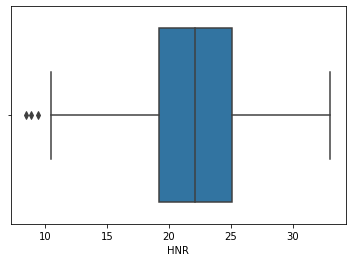

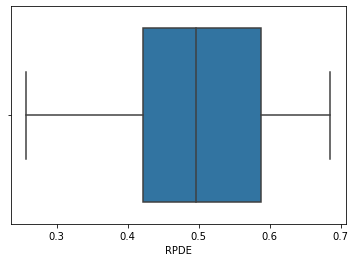

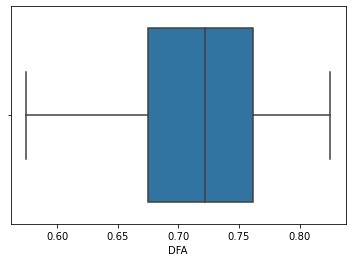

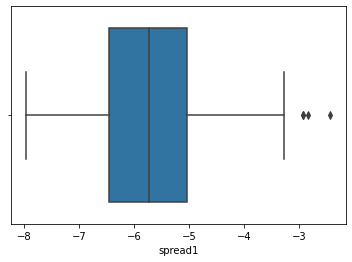

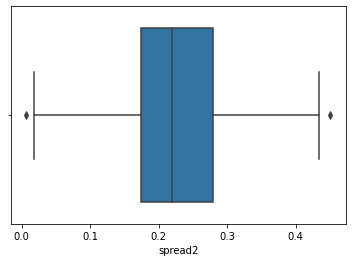

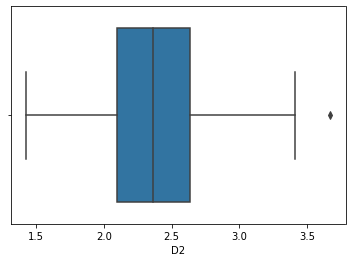

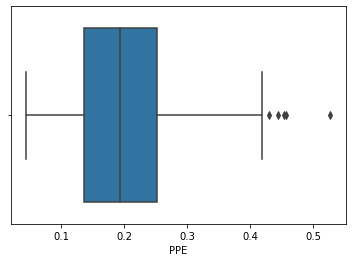

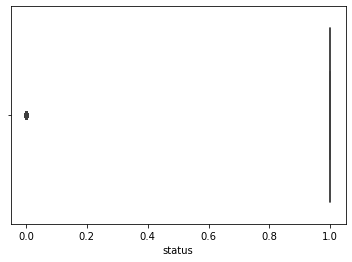

In [8]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

<AxesSubplot:>

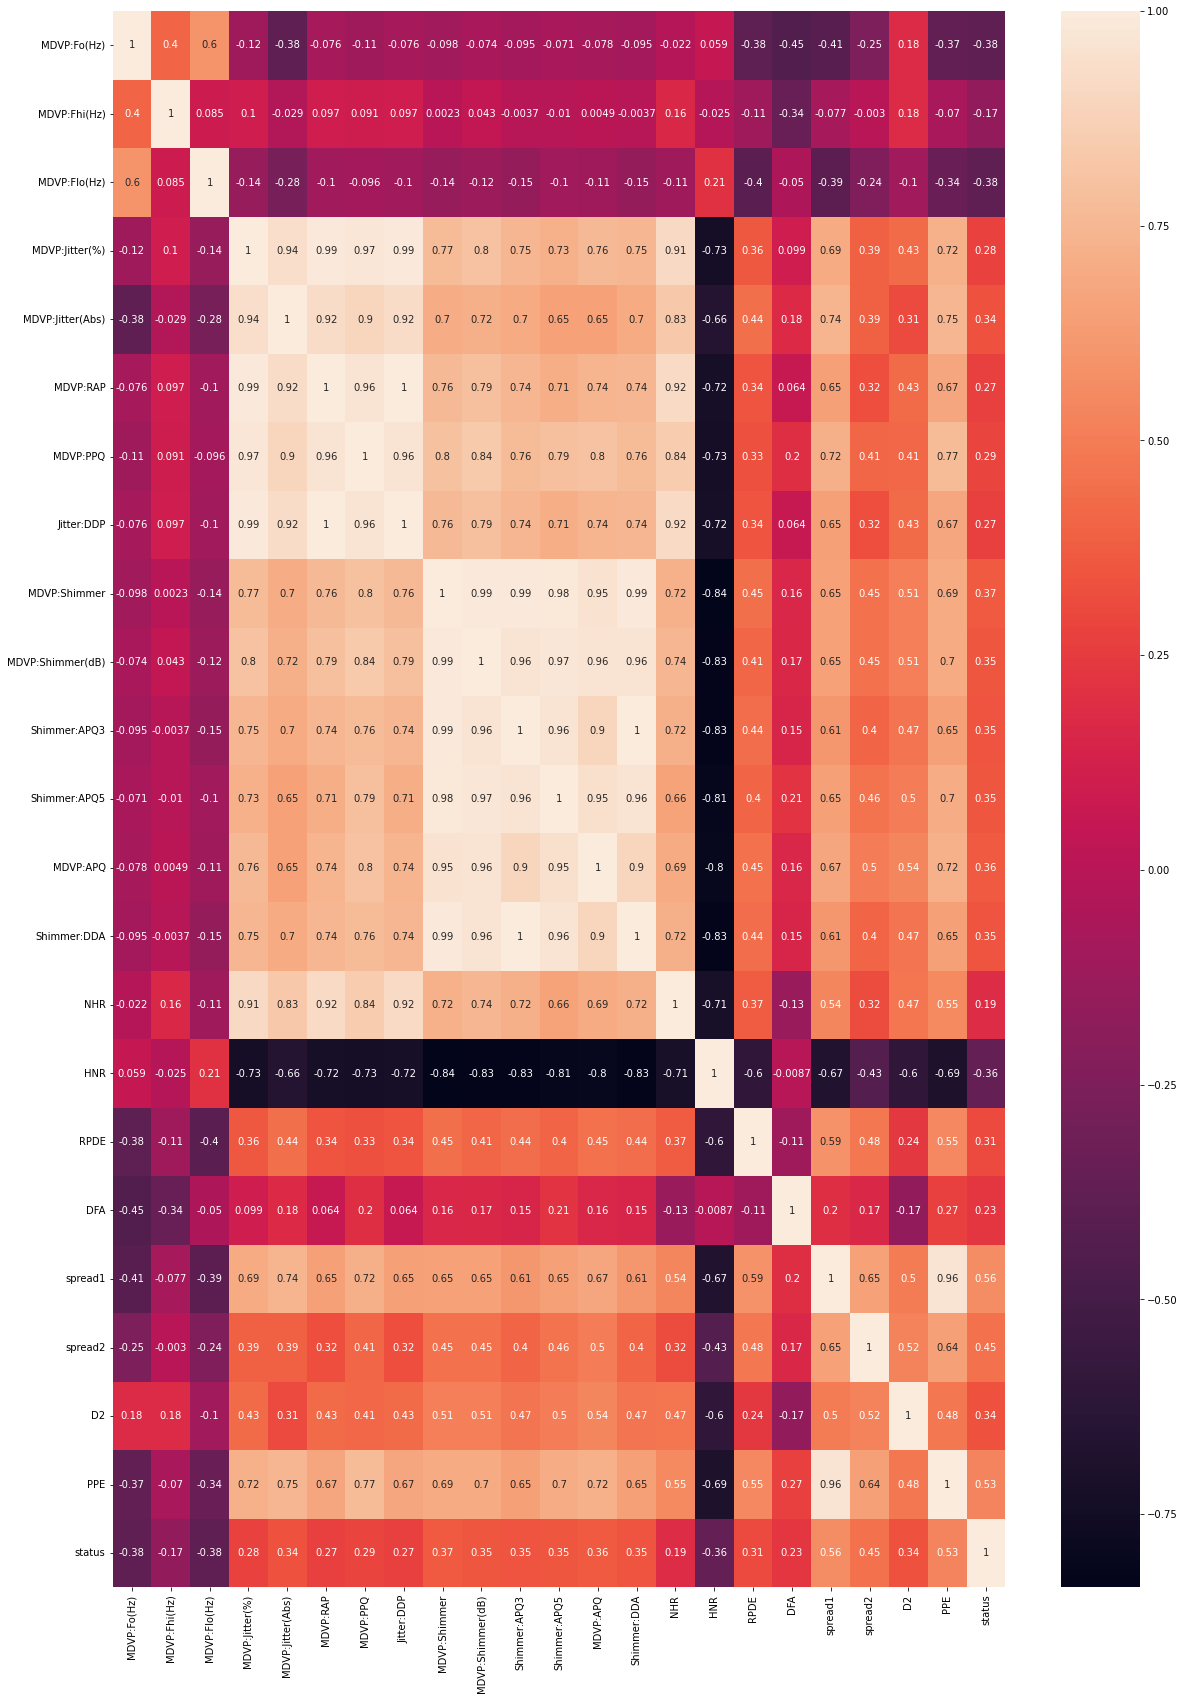

In [9]:
plt.figure(figsize=(20,29))
corr=df.corr()
sns.heatmap(corr, annot=True)

In [10]:
x=df.drop(["status"], axis=1)
y=df["status"]

In [11]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print (Counter(y))

Counter({1: 147, 0: 48})


In [12]:
ros=RandomOverSampler()
x_ros, y_ros= ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({1: 147, 0: 147})


In [13]:
scaler= MinMaxScaler((-1,1))
x=scaler.fit_transform(x_ros)
y=y_ros


In [14]:
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA = pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

(294, 22)
(294, 8)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=7)

                       Method Used  Accuracy
0               Logistc REgression  0.762712
1                    Decision Tree  0.932203
2  Random Forest(information gain)  0.983051
3           Random Forest(Entropy)  0.983051
4                              SVM  0.932203
5                              KNN  0.966102
6                              gnb  0.864407
7                              bnb  0.813559
8                              evc  0.864407
AxesSubplot(0.125,0.125;0.775x0.755)


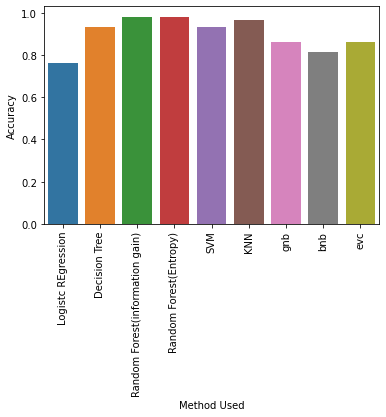

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

list_met=[]
list_accuracy=[]

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4,max_iter=1000,solver = 'liblinear')
lr=classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
accuracy_LR=accuracy_score(y_test,y_pred)
#pplying desicion tree
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=14)
dt = classifier2.fit(x_train,y_train)

y_pred2 = classifier2.predict(x_test)

accurasy_DT= accuracy_score(y_test,y_pred2)

from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state = 14)
rfi=classifier3.fit(x_train,y_train)
y_pred3 = classifier3.predict(x_test)
accuracy_RFI = accuracy_score(y_test,y_pred3)


from sklearn.ensemble import RandomForestClassifier

classifier4 = RandomForestClassifier(criterion='entropy')
rfe=classifier4.fit(x_train,y_train)
y_pred4 = classifier4.predict(x_test)
accuracy_RFE= accuracy_score(y_test,y_pred4)



from sklearn.svm import SVC
model_svm = SVC(cache_size=100)
svm = model_svm.fit(x_train,y_train)
y_pred5 = model_svm.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_pred5)


from sklearn.neighbors import KNeighborsClassifier

model_knn3 =  KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)
pred_knn3 = model_knn3.predict(x_test)
accuracy_SVM = accuracy_score(y_test,pred_knn3)


from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb=gnb.fit(x_train,y_train)
pred_gnb = gnb.predict(x_test)
accuracy_GNB = accuracy_score(y_test,pred_gnb)


from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
bnb = model.fit(x_train, y_train)
pred_bnb = model.predict(x_test)
accuracy_BNB = accuracy_score(y_test,pred_bnb)


from sklearn.ensemble import VotingClassifier
evc = VotingClassifier(estimators = [('lr',lr),('rfi',rfi),('DT',dt)
                                    ,('svm',svm),('knn',knn),('bnb',bnb)],voting = 'hard',
                                    flatten_transform = True)
model_evc = evc.fit(x_train,y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test,pred_gnb)
list1=['Logistc REgression','Decision Tree','Random Forest(information gain)','Random Forest(Entropy)','SVM','KNN','gnb','bnb','evc']

list2 = [accuracy_LR,accurasy_DT,accuracy_RFI,accuracy_RFE,accuracy_svc,accuracy_SVM,accuracy_GNB,accuracy_BNB,accuracy_evc]
list3=[classifier,classifier2,classifier3,classifier4,model_knn3,gnb,model]

df_Accuracy = pd.DataFrame({'Method Used':list1,'Accuracy':list2})
print(df_Accuracy)
chart = sns.barplot(x='Method Used',y='Accuracy',data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation =90)
print(chart)



In [40]:
from xgboost import XGBClassifier 

model_xg=XGBClassifier()
model_xg.fit(x_train, y_train)

[08:51:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
y_pred = model_xg.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

98.30508474576271


In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xg.predict(x_test))


In [46]:
from sklearn.metrics import f1_score
f1_score(y_test,model_xg.predict(x_test),average='binary')


0.9859154929577464

In [47]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,model_xg.predict(x_test)))
print('Confusion Matrix')
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.97      1.00      0.99        35

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

Confusion Matrix
[[23  1]
 [ 0 35]]


In [48]:
for i in list3:
    print("************************************************",i,"**************************************************")
    print(classification_report(y_test,i.predict(x_test)))
    print('confusion_matrix:')
    print(confusion_matrix(y_test,i.predict(x_test)))
    print()

************************************************ LogisticRegression(C=0.4, max_iter=1000, solver='liblinear') **************************************************
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        24
           1       0.78      0.83      0.81        35

    accuracy                           0.76        59
   macro avg       0.76      0.75      0.75        59
weighted avg       0.76      0.76      0.76        59

confusion_matrix:
[[16  8]
 [ 6 29]]

************************************************ DecisionTreeClassifier(random_state=14) **************************************************
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.92      0.97      0.94        35

    accuracy                           0.93        59
   macro avg       0.94      0.92      0.93        59
weighted avg       0.93      0.93      0.93        59

confusi

In [53]:

def plot_roc(model,X_test,y_test):
    probabilities = model.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr,tpr,threshold =roc_curve(y_test,predictions[:,1])
    roc_auc = auc(fpr,tpr)
    
    plt.title('Receiver Operating Characterstic')
    plt.plot(fpr,tpr,'b',label ="AUC = %0.2f"%roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    

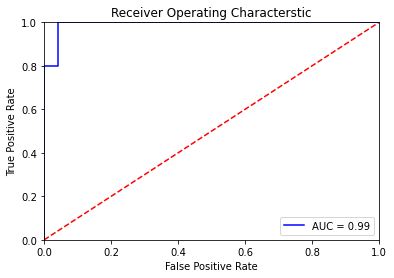

In [54]:
plot_roc(model_xg,x_test,y_test)


---------------------------ROC FOR list[0] +PCA-------------------------------


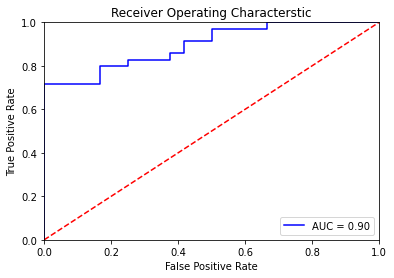



---------------------------ROC FOR list[1] +PCA-------------------------------


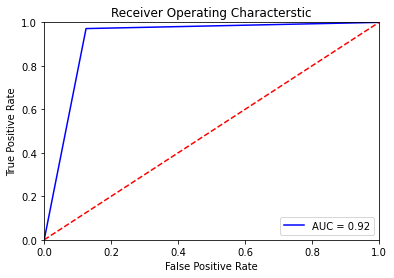



---------------------------ROC FOR list[2] +PCA-------------------------------


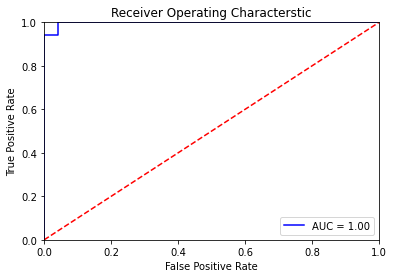



---------------------------ROC FOR list[3] +PCA-------------------------------


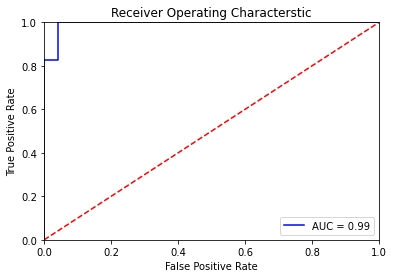



---------------------------ROC FOR list[4] +PCA-------------------------------


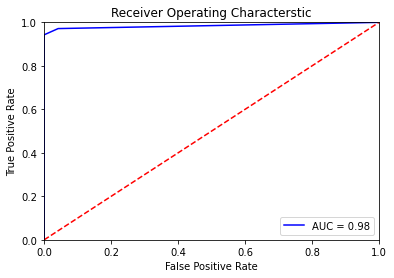



---------------------------ROC FOR list[5] +PCA-------------------------------


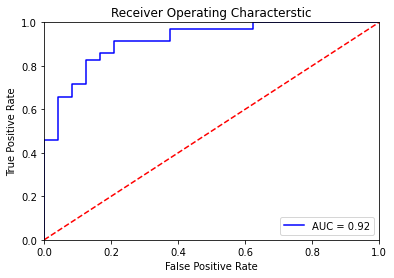



---------------------------ROC FOR list[6] +PCA-------------------------------


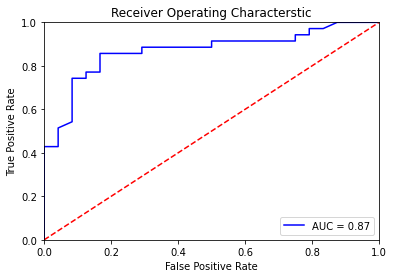

In [55]:
for i in range(0,len(list3)):
    try:
        print()
        print("---------------------------ROC FOR",list[i],"+PCA-------------------------------")
        plot_roc(list3[i],x_test,np.array(y_test))
        print()
    except:
        print("roc not valid")